**BREAST CANCER DETECTION USING CNN ON ULTRASOUND IMAGES**

import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


here the code visualize one image from all three class

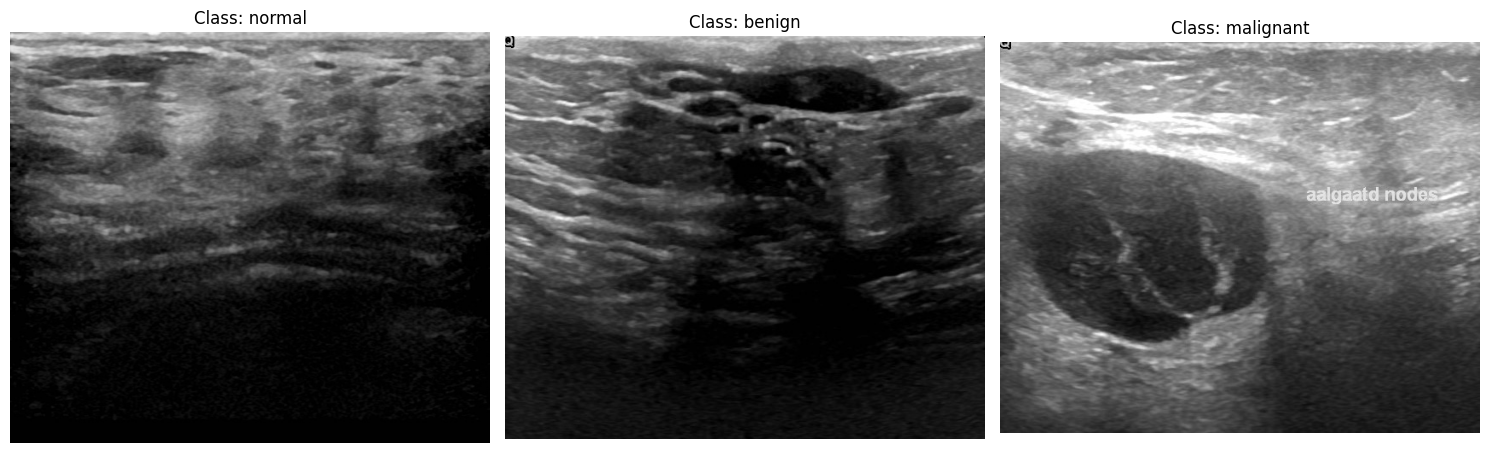

In [2]:
root_directory = '/content/drive/MyDrive/MP/train_data'
class_folders = os.listdir(root_directory)
num_classes_to_display = min(3, len(class_folders))
plt.figure(figsize=(15, 8))
for i in range(num_classes_to_display):
    class_folder = class_folders[i]
    class_path = os.path.join(root_directory, class_folder)
    class_images = os.listdir(class_path)

    if class_images:

        random_image_name = random.choice(class_images)
        random_image_path = os.path.join(class_path, random_image_name)

        random_image = Image.open(random_image_path)
        plt.subplot(1, num_classes_to_display, i + 1)
        plt.imshow(random_image)
        plt.title(f"Class: {class_folder}")
        plt.axis('off')

plt.tight_layout()
plt.show()


define the function to load and seprate the image and its class as x and y

In [3]:
def load_dataset(dataset_path):
    X = []
    y = []
    classes = os.listdir(dataset_path)
    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)

        if not os.path.isdir(class_dir):
            continue
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isdir(image_path):
                continue
            X.append(image_path)
            y.append(class_name)
    return X, y

dataset_path = "/content/drive/MyDrive/MP/train_data"
X, y = load_dataset(dataset_path)

this code gives the no of samples contains in each class

In [4]:
class_image_counts = {}

for class_folder in class_folders:
    class_path = os.path.join(root_directory, class_folder)
    class_images = os.listdir(class_path)
    num_images = len(class_images)
    class_image_counts[class_folder] = num_images
for class_folder, num_images in class_image_counts.items():
    print(f"Class '{class_folder}': {num_images} images")


Class 'normal': 129 images
Class 'benign': 371 images
Class 'malignant': 193 images


here the y is categorical so it converted into numeric value using the label encoder. define the function to set target size (224,224),convert into array,normalize the pixel value dividing by 255.
split the data into train and test using train_test_split with test size 0.2

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array /= 255.0
    return img_array

X_processed = [preprocess_image(img_path) for img_path in X]

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (554, 224, 224, 3)
X_test shape: (139, 224, 224, 3)
y_train shape: (554,)
y_test shape: (139,)


here model_Breast is the cnn model which is build with multiple layers of conv2d(3,3),Maxpooling(2,2),flatten layers,dropout of 0.5 and dense layer with activation function relu and softmax. adam used for optimization compiled with categorical crossentropy.

In [ ]:
learning_rate = 0.003

model_Breast = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_Breast.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model_Breast.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_90 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 26, 26, 128)     

now the developed model is trained with train dataset with batch size = 32 and epoch = 60 with early stopping of patience 10.
then the trained model is validated with test data.

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

num_classes = len(label_encoder.classes_)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)
history = model_Breast.fit(X_train, y_train_one_hot, batch_size=32, epochs=60, validation_data=(X_test, y_test_one_hot),callbacks=[early_stopping])

test_loss, test_accuracy = model_Breast.evaluate(X_test, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/60
18/18 [==============================] - 5s 98ms/step - loss: 1.0411 - accuracy: 0.5271 - val_loss: 1.0381 - val_accuracy: 0.5180
Epoch 2/60
18/18 [==============================] - 1s 66ms/step - loss: 1.0091 - accuracy: 0.5379 - val_loss: 1.0212 - val_accuracy: 0.5180
Epoch 3/60
18/18 [==============================] - 1s 67ms/step - loss: 1.0330 - accuracy: 0.5397 - val_loss: 1.0785 - val_accuracy: 0.5180
Epoch 4/60
18/18 [==============================] - 1s 57ms/step - loss: 0.9996 - accuracy: 0.5397 - val_loss: 0.9731 - val_accuracy: 0.5180
Epoch 5/60
18/18 [==============================] - 1s 60ms/step - loss: 0.9237 - accuracy: 0.5397 - val_loss: 0.9511 - val_accuracy: 0.5180
Epoch 6/60
18/18 [==============================] - 1s 58ms/step - loss: 0.8870 - accuracy: 0.5451 - val_loss: 0.9057 - val_accuracy: 0.5180
Epoch 7/60
18/18 [==============================] - 1s 61ms/step - loss: 0.8055 - accuracy: 0.6245 - val_loss: 0.8428 - val_accuracy: 0.5899
Epoch 8/60
18

here the code generates first 20 predicted result and the actual label of the test data

In [ ]:
y_pred_probabilities = model_Breast.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred)

y_true_labels = label_encoder.inverse_transform(y_test)

for i in range(20):
    print(f"True Label: {y_true_labels[i]}, Predicted Label: {y_pred_labels[i]}")

5/5 [==============================] - 0s 20ms/step
True Label: benign, Predicted Label: benign
True Label: malignant, Predicted Label: malignant
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: malignant
True Label: normal, Predicted Label: normal
True Label: benign, Predicted Label: benign
True Label: benign, Predicted Label: malignant
True Label: benign, Predicted Label: benign
True Label: malignant, Predicted Label: benign
True Label: malignant, Predicted Label: benign
True Label: malignant, Predicted Label: malignant


here the code prints the accuracy, precision,recall and f1_score of our model performance

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8273381294964028
Precision: 0.8269896174099128
Recall: 0.8273381294964028
F1 Score: 0.8265792499381894


here visualy ploted the first 20 predicted test class and its actual class

5/5 [==============================] - 0s 20ms/step


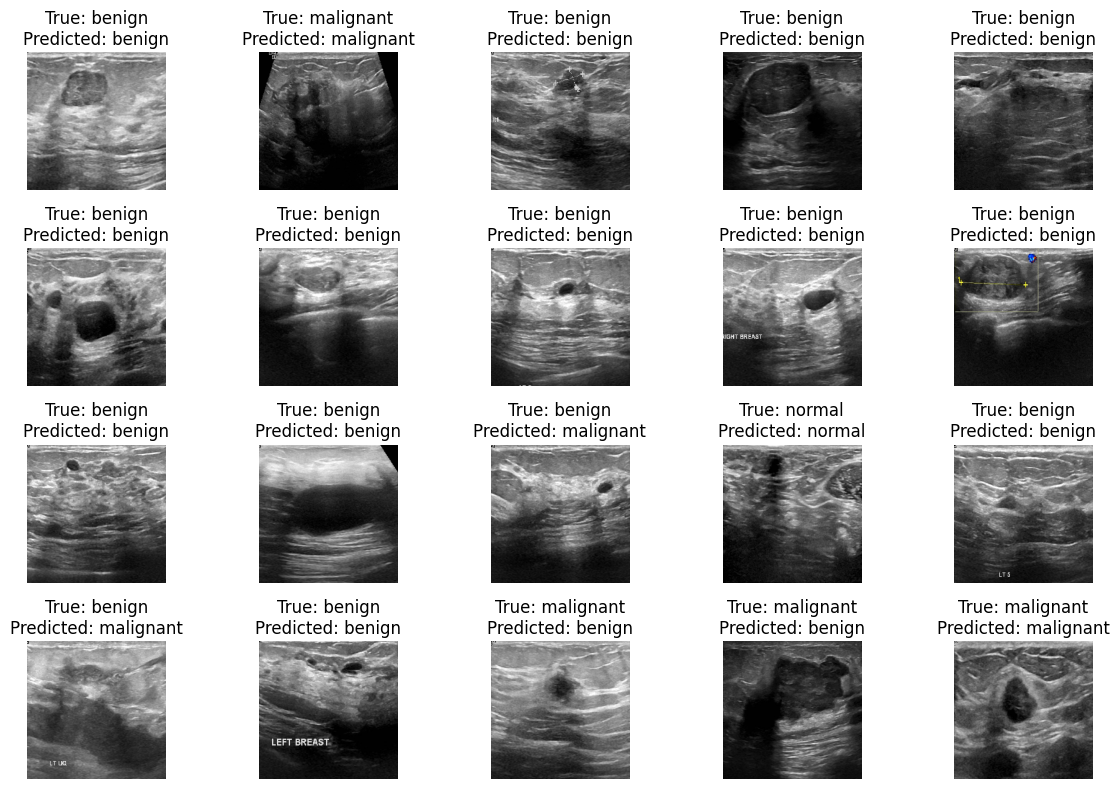

In [ ]:
y_pred_one_hot = model_Breast.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred)

y_true_labels = label_encoder.inverse_transform(y_test)

plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {y_true_labels[i]}\nPredicted: {y_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


here ploted the line chart of models performance based on its model accuracy and its validation and training loss

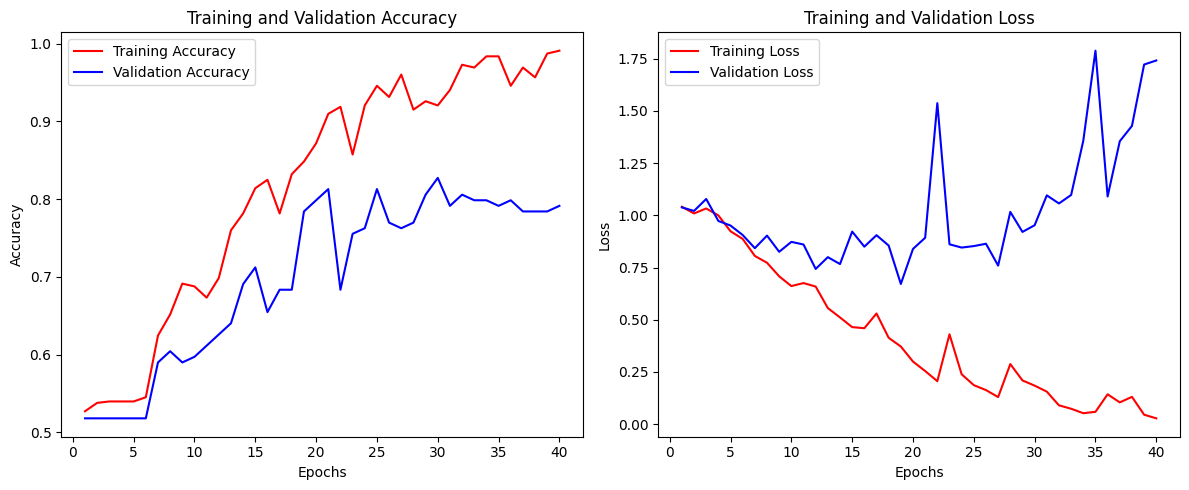

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


here the code plots the confusion matrix with respect to predicted value and its actual value

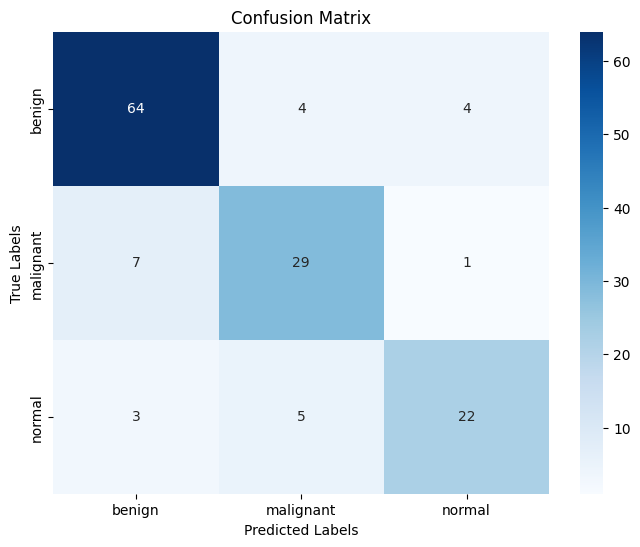

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

here the new image from the test data has been used to predict thye class

In [ ]:
class_names = ['bening', 'malignant', 'normal']
img_path = '/content/drive/MyDrive/MP/train_data/malignant/malignant (165).png'
img = load_img(img_path, target_size=(224, 224,3))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

predictions = model_Breast.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class: {predicted_class_name}")

1/1 [==============================] - 0s 467ms/step
Predicted class: malignant
